In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

Display Image Directly

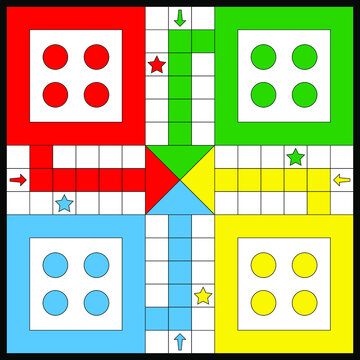

In [2]:
Image("ludo.jpg")

Reading images using OpenCV

OpenCV allows reading different types of images (JPG, PNG, etc). You can load grayscale images, color images or you can also load images with Alpha channel. It uses the cv2.imread() function which has the following syntax:

The function has 1 required input argument and one optional flag:

filename: This can be an absolute or relative path. This is a mandatory argument.

Flags: These flags are used to read an image in a particular format (for example, grayscale/color/with alpha channel). This is an optional argument with a default value of cv2.IMREAD_COLOR or 1 which loads the image as a color image.

Before we proceed with some examples, let's also have a look at some of the flags available.

Flags

cv2.IMREAD_GRAYSCALE or 0: Loads image in grayscale mode

cv2.IMREAD_COLOR or 1: Loads a color image. Any transparency of image will be neglected. It is the default flag.

cv2.IMREAD_UNCHANGED or -1: Loads image as such including alpha channel.

In [7]:
# Read image as gray scale.
board = cv2.imread("board.png", 0)

# printing the pixel values of image (2d numpy array)
# Each pixel value is 8-bits [0,255]
print(board)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0 255 255 ...   0   0   0]
 [  0 255 255 ...   0   0   0]
 [  0 255 255 ...   0   0   0]]


Image Attributes

In [8]:
# print the size  of image
print("Image size (H, W) is:", board.shape)

# print data-type of image
print("Data type of image is:", board.dtype)

Image size (H, W) is: (373, 373)
Data type of image is: uint8


Using matplotlib to display the image

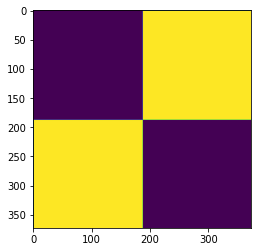

In [9]:
plt.imshow(board)

Even though the image was read in as a gray scale image, it won't necessarily display in gray scale when using imshow(). matplotlib uses different color maps and it's possible that the gray scale color map is not set.

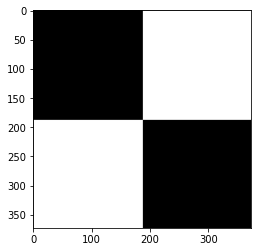

In [10]:
# Set color map to gray scale for proper rendering.
plt.imshow(board, cmap="gray")

Working with color images

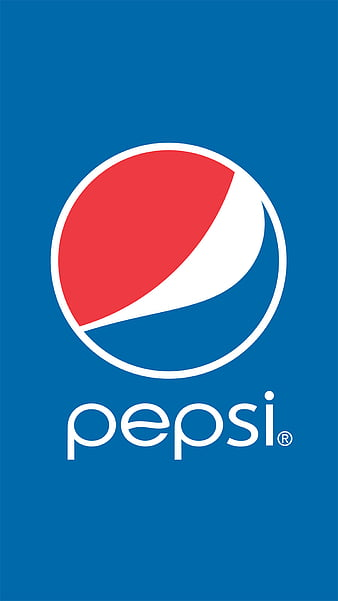

In [12]:
Image("pepsi.jpg")

In [11]:
pepsi = cv2.imread("pepsi.jpg" , 1)

print(pepsi.shape)
print(pepsi.dtype)


(601, 338, 3)
uint8


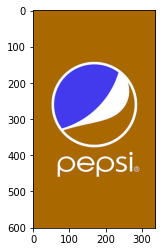

In [13]:
plt.imshow(pepsi)

The color displayed above is different from the actual image. This is because matplotlib expects the image in RGB format whereas OpenCV stores images in BGR format. Thus, for correct display, we need to reverse the channels of the image. 

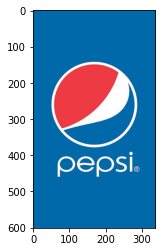

In [14]:
pepsi_img_channels_reversed = pepsi[:, :, ::-1]
plt.imshow(pepsi_img_channels_reversed)

Splitting and Merging Color Channels

cv2.split() Divides a multi-channel array into several single-channel arrays.

cv2.merge() Merges several arrays to make a single multi-channel array. All the input matrices must have the same size.

Text(0.5, 1.0, 'Merged Output')

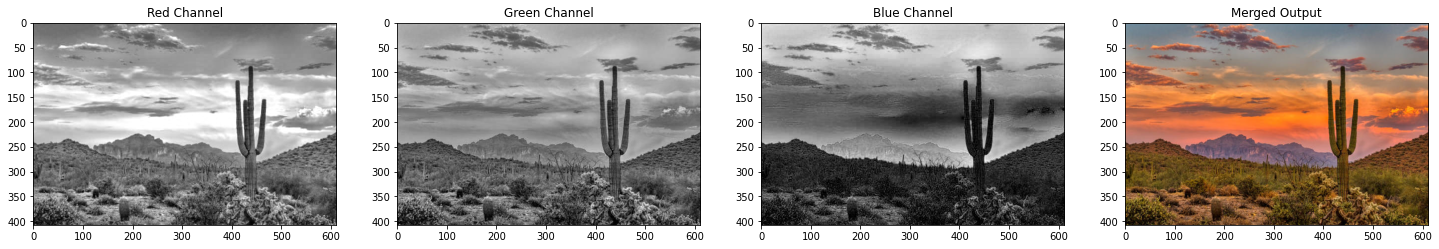

In [11]:
# Split the image into the B,G,R components
img_scene_bgr = cv2.imread("scene.jpg", cv2.IMREAD_COLOR)
b, g, r = cv2.split(img_scene_bgr)

# Show the channels
plt.figure(figsize=[25, 8])

plt.subplot(141);plt.imshow(r, cmap="gray");plt.title("Red Channel")
plt.subplot(142);plt.imshow(g, cmap="gray");plt.title("Green Channel")
plt.subplot(143);plt.imshow(b, cmap="gray");plt.title("Blue Channel")

# Merge the individual channels into a BGR image
imgMerged = cv2.merge((b, g, r))
# Show the merged output
plt.subplot(144)
plt.imshow(imgMerged[:, :, ::-1])
plt.title("Merged Output")

The lighter the color mapping , the intense the particular channel is in source image
For example in the above scenery , there is more redness as compared to blue hence red channel 
is comparatively lighter than blue channel

Converting to different Color Spaces

cv2.cvtColor() Converts an image from one color space to another. The function converts an input image from one color space to another. In case of a transformation to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.

Function Syntax
dst = cv2.cvtColor( src, code )
dst: Is the output image of the same size and depth as src.

The function has 2 required arguments:

src input image: 8-bit unsigned, 16-bit unsigned ( CV_16UC... ), or single-precision floating-point.

code color space conversion code (see ColorConversionCodes).

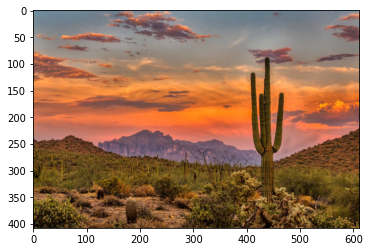

In [7]:
# OpenCV stores color channels in a differnet order than most other applications (BGR vs RGB).
img_scene_rgb = cv2.cvtColor(img_scene_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_scene_rgb)

Trying HSV color space

Text(0.5, 1.0, 'Original')

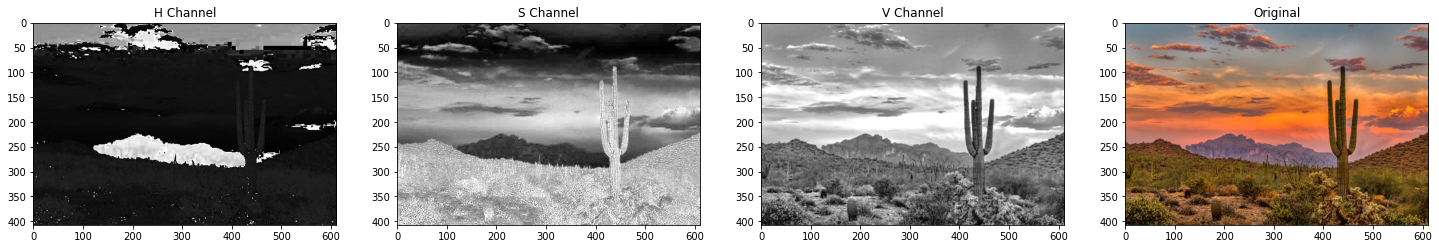

In [19]:
img_scene_hsv = cv2.cvtColor(img_scene_bgr , cv2.COLOR_BGR2HSV)
#plt.imshow(img_scene_hsv)

# spliting into individual channels h,s,v
h,s,v = cv2.split(img_scene_hsv)

# seeing the channels
plt.figure(figsize=[25, 8])

plt.subplot(141)
plt.imshow(h,cmap="gray")
plt.title("H Channel")

plt.subplot(142)
plt.imshow(s,cmap="gray")
plt.title("S Channel")

plt.subplot(143)
plt.imshow(v,cmap="gray")
plt.title("V Channel")

plt.subplot(144)
plt.imshow(img_scene_rgb)
plt.title("Original")

* Hue is the color itself, such as red, green, or blue.
* Saturation is the intensity of the color, from pure to gray.
* Value is the brightness of the color, from black to white.


Lets try modifying individual channel 

Task : Increase the hueness of the scenery by 10 units

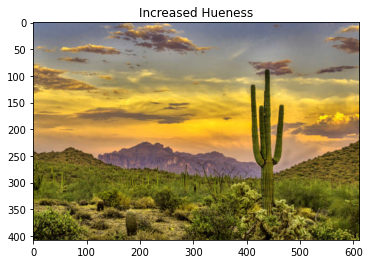

In [25]:
new_h = h + 10
scene_modified = cv2.merge((new_h, s,v))

new_scene = cv2.cvtColor(scene_modified , cv2.COLOR_HSV2RGB)

plt.title("Increased Hueness")
plt.imshow(new_scene)

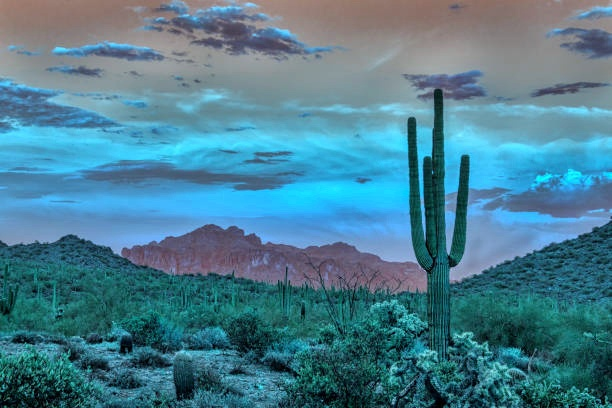

In [30]:
# saving the image
# params : "new_image_name" , image

cv2.imwrite("updatedScenery.jpg" , new_scene)

Image("updatedScenery.jpg")

In [31]:
# read the image as Color
img = cv2.imread("updatedScenery.jpg", cv2.IMREAD_COLOR)
print("img shape (H, W, C) is:", img.shape)

# read the image as Grayscaled
img_gry = cv2.imread("updatedScenery.jpg", cv2.IMREAD_GRAYSCALE)
print("img_NZ_gry shape (H, W) is:", img_gry.shape)

img shape (H, W, C) is: (408, 612, 3)
img_NZ_gry shape (H, W) is: (408, 612)


Using openCV imshow function

In [3]:
image = cv2.imread("ludo.jpg")
window = cv2.namedWindow("w")
cv2.imshow(window , image )
cv2.waitKey(8000)
cv2.destroyWindow(window)